## **1) Importing the necessary libraries**

In [1]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import torch
import torchvision
import sys

## **2) Load the image**

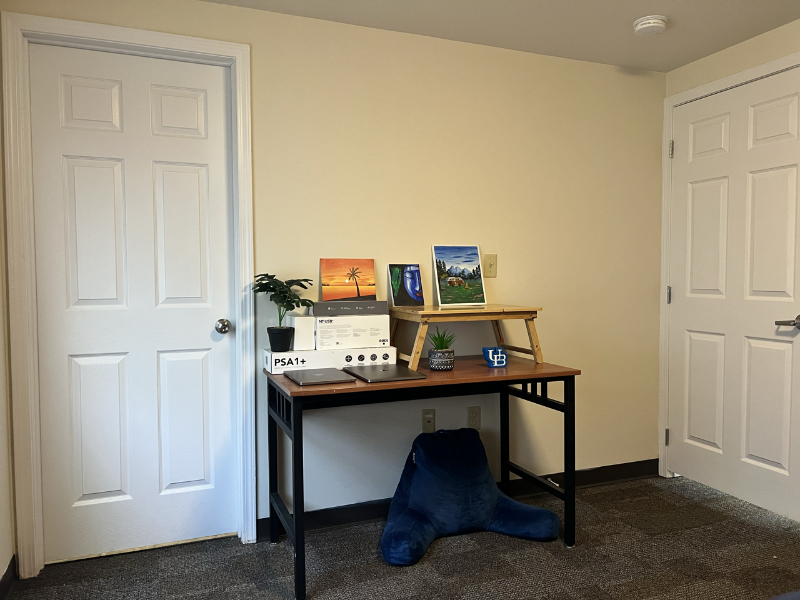

In [2]:
image_path = "myroom.png"
image = cv2.imread(image_path)

new_width = 800
new_height = 600

resized_image = cv2.resize(image, (new_width, new_height))

cv2_imshow(resized_image)

## **3) Draw the points on the image**

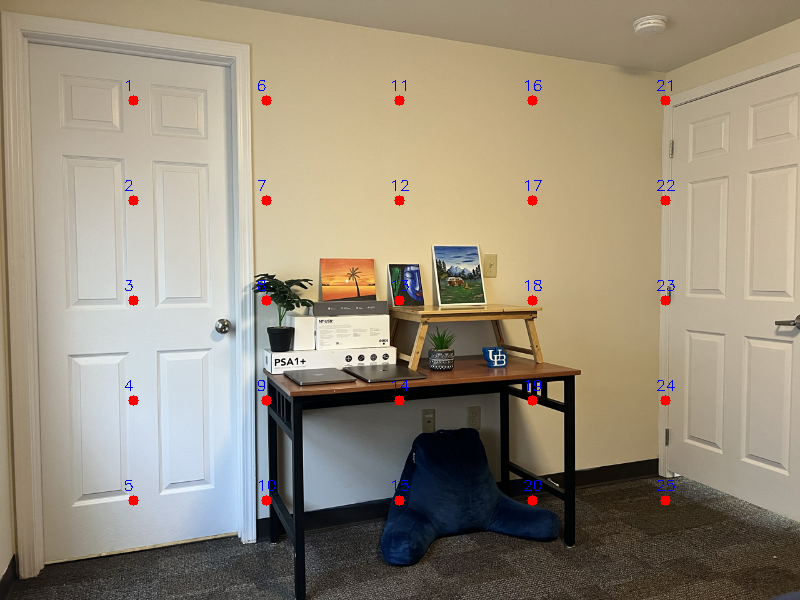

{1: (133, 100), 2: (133, 200), 3: (133, 300), 4: (133, 400), 5: (133, 500), 6: (266, 100), 7: (266, 200), 8: (266, 300), 9: (266, 400), 10: (266, 500), 11: (399, 100), 12: (399, 200), 13: (399, 300), 14: (399, 400), 15: (399, 500), 16: (532, 100), 17: (532, 200), 18: (532, 300), 19: (532, 400), 20: (532, 500), 21: (665, 100), 22: (665, 200), 23: (665, 300), 24: (665, 400), 25: (665, 500)}


In [3]:
# Determine the size of the image
height, width, channels = image.shape

# Calculate the spacing for the points
x_spacing = width // 6
y_spacing = height // 6

points_dict = {}

# Draw the points on the image
point_num = 1
for i in range(1, 6):
    for j in range(1, 6):
        x = i * x_spacing
        y = j * y_spacing
        points_dict[point_num] = (x, y)
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)  # Red color, filled circle
        cv2.putText(image, str(point_num), (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
        point_num += 1

# Display the image

resized_image = cv2.resize(image, (new_width, new_height))

cv2_imshow(resized_image)

print(points_dict)



In [4]:
import matplotlib.pyplot as plt

In [5]:
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-n0fb8g89
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-n0fb8g89
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=4b7fc90c7178e63e613f9ccd0cfbe3d01c8e3fbdc5f43b34b3e0f5c28f0e59a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-9da29j2y/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything
--2024-02-22 13:14:56--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.78, 13.226.210.111, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.22

In [6]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([119/255, 19/255, 14/255, 0.7])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

In [7]:
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda")

predictor = SamPredictor(sam)

In [8]:
image = cv2.imread('myroom.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
predictor.set_image(image)

In [12]:
input_point = np.array([[639, 160]])
input_label = np.array([1])

In [13]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

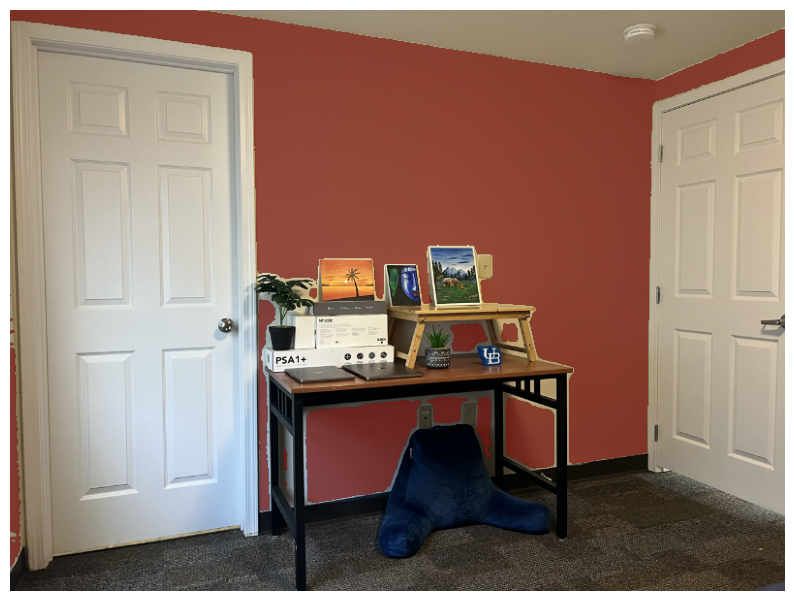

In [14]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    #plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()


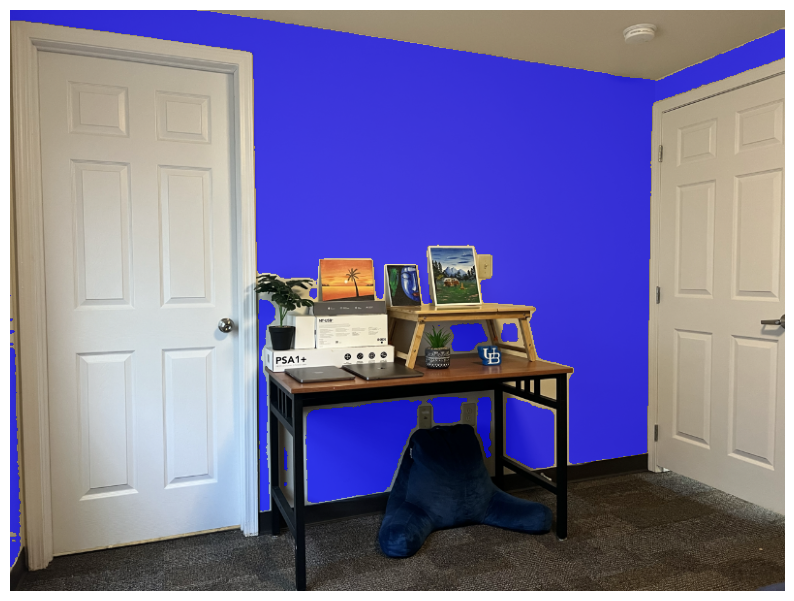

In [16]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([0, 0, 1, 0.7])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda")

predictor = SamPredictor(sam)
image = cv2.imread('myroom.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
input_point = np.array([[639, 160]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    #plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()


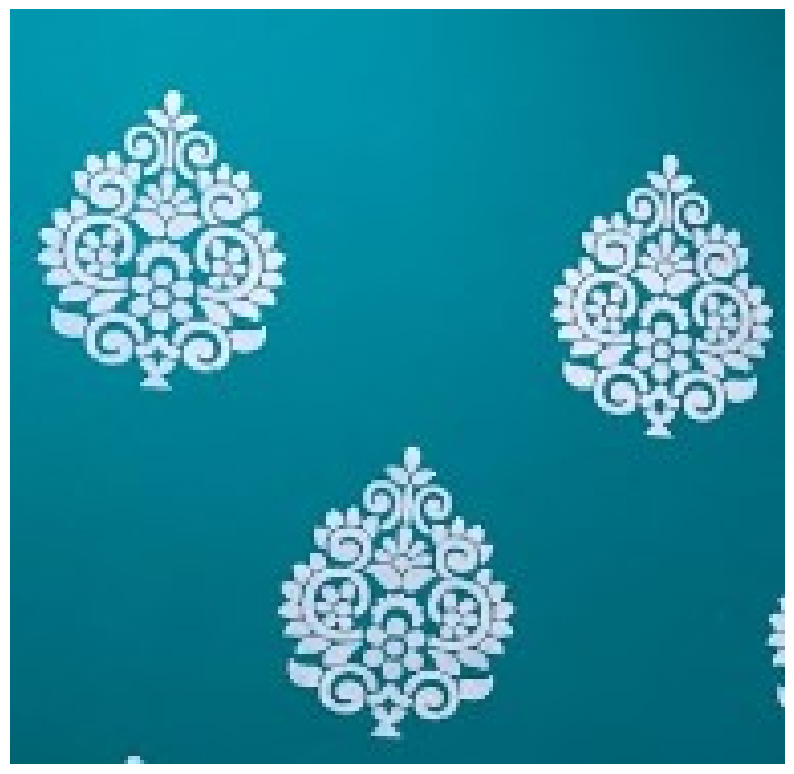

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

def show_mask(mask_image, ax):
    ax.imshow(mask_image)
    ax.axis('off')

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda")

predictor = SamPredictor(sam)
image = cv2.imread('myroom.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
input_point = np.array([[639, 160]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

# Load your mask image
mask_image = plt.imread('Screenshot_12.jpg')

# Iterate over masks and display
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask_image, plt.gca())  # Pass the mask image instead of color
    plt.axis('off')
    plt.show()


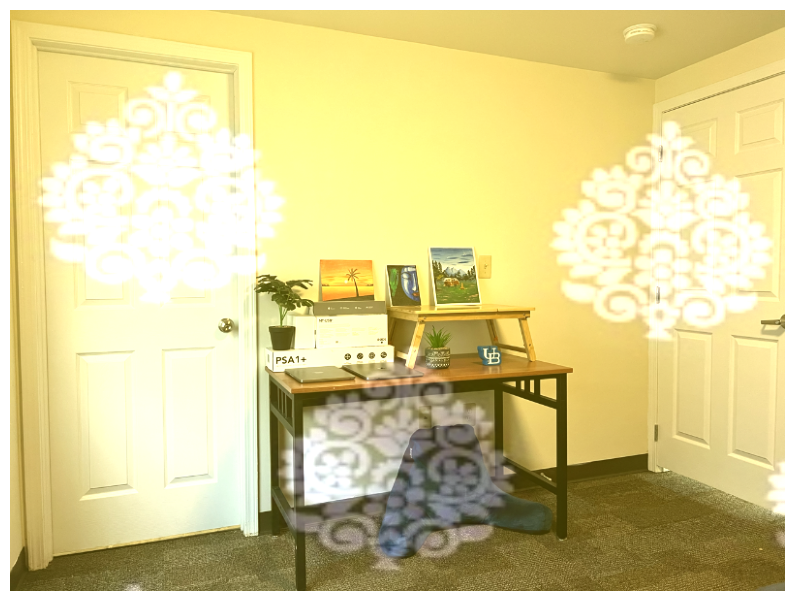

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

def overlay_mask(image, mask_image):
    # Ensure mask image and original image have the same dimensions
    mask_image_resized = cv2.resize(mask_image, (image.shape[1], image.shape[0]))

    # Blend the images using alpha blending
    blended_image = cv2.addWeighted(image, 1, mask_image_resized, 0.5, 0)
    return blended_image

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda")

predictor = SamPredictor(sam)
image = cv2.imread('myroom.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
input_point = np.array([[639, 160]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

# Load your mask image
mask_image = cv2.imread('Screenshot_12.png')

# Iterate over masks and display
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    blended_image = overlay_mask(image, mask_image)  # Overlay mask image on original image
    plt.imshow(blended_image)
    plt.axis('off')
    plt.show()


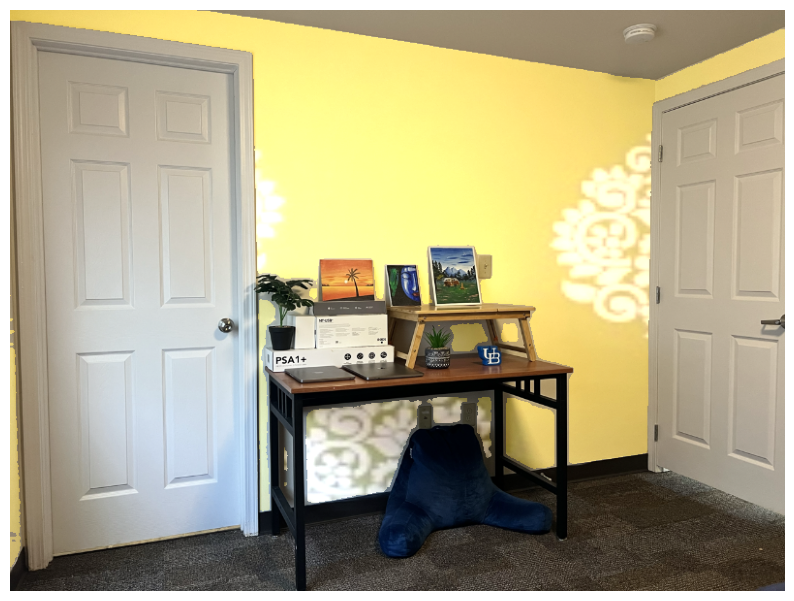

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import sys

def overlay_mask_on_predicted(image, mask_image, mask):
    # Convert mask to binary
    mask_binary = np.where(mask > 0, 1, 0).astype(np.uint8)

    # Resize the mask image to match the dimensions of the original image
    mask_image_resized = cv2.resize(mask_image, (image.shape[1], image.shape[0]))

    # Multiply mask image with binary mask to only keep the mask in the predicted regions
    masked_image = cv2.bitwise_and(mask_image_resized, mask_image_resized, mask=mask_binary)

    # Blend the masked image with the original image
    blended_image = cv2.addWeighted(image, 1, masked_image, 0.5, 0)
    return blended_image

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device="cuda")

predictor = SamPredictor(sam)
image = cv2.imread('myroom.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)
input_point = np.array([[639, 160]])
input_label = np.array([1])
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

# Load your mask image
mask_image = cv2.imread('mask_image.jpg')

# Iterate over masks and display
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    blended_image = overlay_mask_on_predicted(image, mask_image, mask)  # Overlay mask image on predicted areas
    plt.imshow(blended_image)
    plt.axis('off')
    plt.show()
